# Title of ML project: Earthquake Magnitude Prediction Model

###  Name: Hasna Ahammed K
###  Organization: Entri Elevate
###  Date: 05/06/2024

1. Overview of Problem Statement:

Predicting the magnitude of an earthquake is crucial for preparing and responding to potential disasters.
The magnitude depends on various factors like depth, location, and time of occurrence. Developing an effective prediction model can aid in better disaster management and preparedness.

2. Objective:

To develop the best earthquake magnitude prediction model using machine learning techniques.

3. Data Description:
 - Source: https://www.kaggle.com/datasets/taghreedaburwished/earthquake-prediction-dataset
 - Features: Date, Time, Latitude, Longitude, Type, Depth, Depth Error, Depth Seismic Stations, Magnitude Type, Magnitude Error, Magnitude Seismic Stations, Azimuthal Gap, Horizontal Distance, Horizontal Error, Root Mean Square, ID, Source, Location Source, Magnitude Source, Status

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

4. Data Collection:

In [4]:
# 4. Data Collection:
# Load the dataset
data = pd.read_csv('database.csv')

# Display the first few rows of the dataset
data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [9]:
# 5. Data Preprocessing - Data Cleaning:
# Handle missing values using appropriate imputation techniques
# Check for and remove outliers using statistical methods
# Address skewed data in numerical features through transformations

In [5]:
data.isnull().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

In [6]:
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = data.select_dtypes(include=[object]).columns.tolist()

In [7]:
numerical_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

In [8]:
# Impute missing values for numerical features
data[numerical_features] = numerical_imputer.fit_transform(data[numerical_features])

# Impute missing values for categorical features
data[categorical_features] = categorical_imputer.fit_transform(data[categorical_features])


In [9]:
data.isnull().sum()

Date                          0
Time                          0
Latitude                      0
Longitude                     0
Type                          0
Depth                         0
Depth Error                   0
Depth Seismic Stations        0
Magnitude                     0
Magnitude Type                0
Magnitude Error               0
Magnitude Seismic Stations    0
Azimuthal Gap                 0
Horizontal Distance           0
Horizontal Error              0
Root Mean Square              0
ID                            0
Source                        0
Location Source               0
Magnitude Source              0
Status                        0
dtype: int64

In [10]:
# Detecting outliers (using Z-score)
from scipy import stats
z_scores = np.abs(stats.zscore(data[numerical_features]))
outliers = (z_scores > 3).all(axis=1)
data_cleaned = data[~outliers]

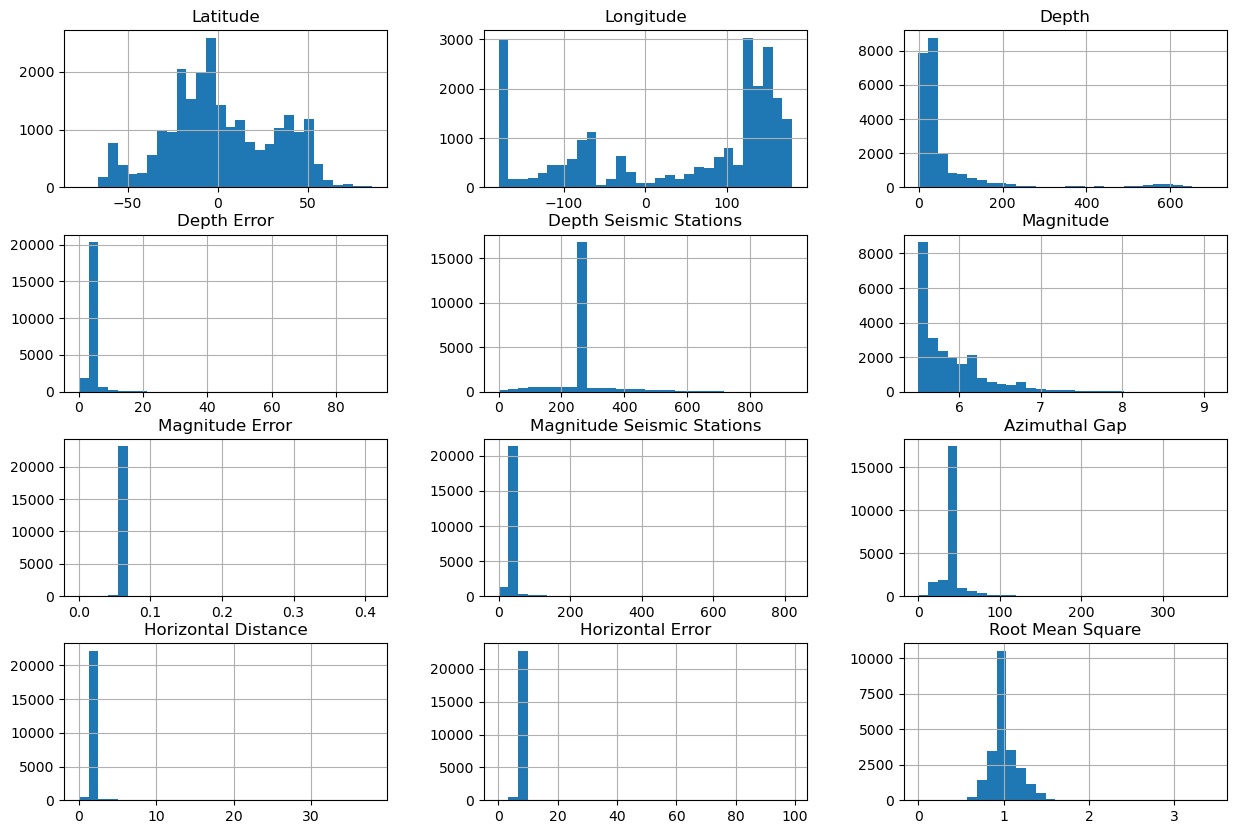

In [11]:
# 6. Exploratory Data Analysis (EDA):
# Visualizations: Histogram, Boxplot, Pair Plot, Heatmap Correlation, Pie Diagram, Bar Plot, Count Plot, Line Plot, KDE
data_cleaned[numerical_features].hist(bins=30, figsize=(15, 10))
plt.show()


<Figure size 1500x1000 with 0 Axes>

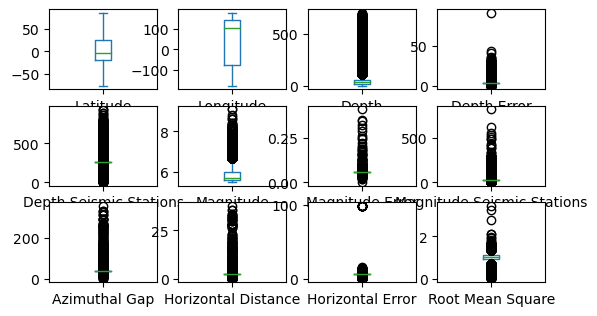

In [22]:
# Boxplots for numerical features
plt.figure(figsize=(15, 10))
data_cleaned[numerical_features].plot(kind='box', subplots=True, layout=(4, 4), sharex=False, sharey=False)
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


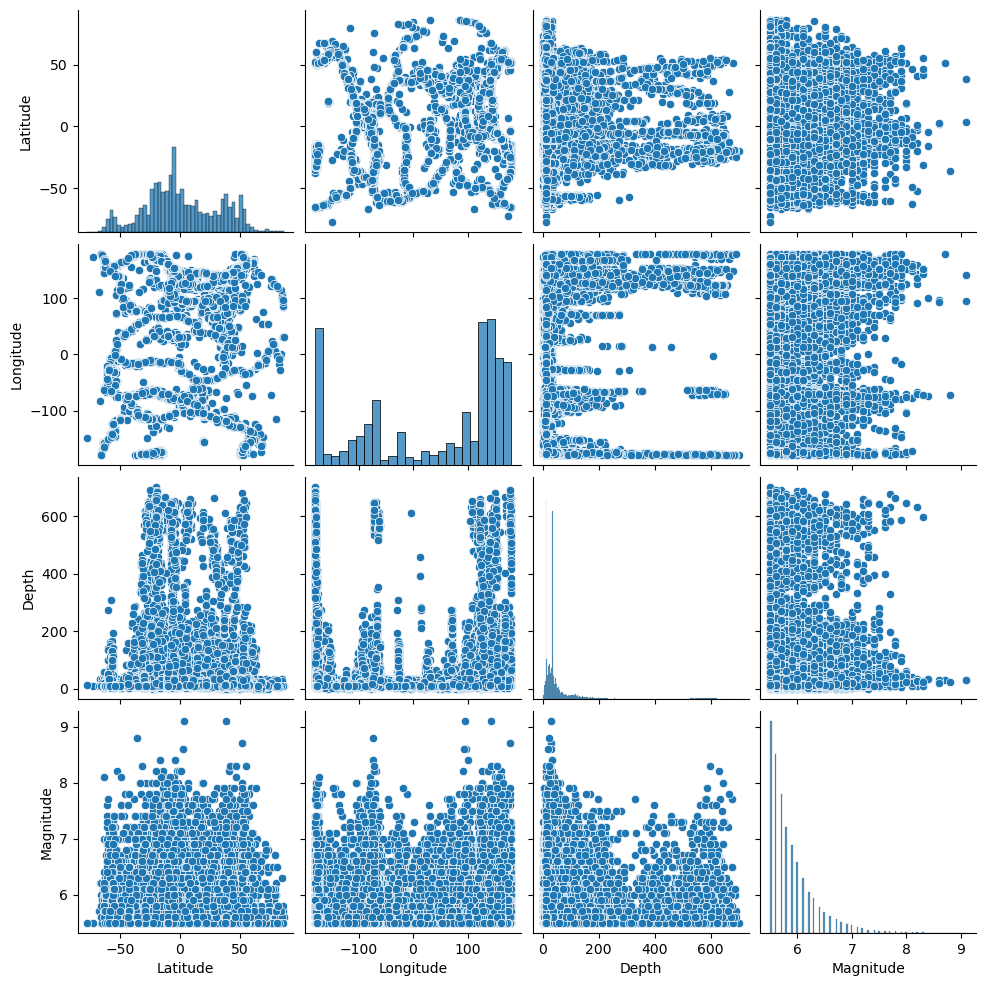

In [23]:
# Pair plot for selected features
sns.pairplot(data_cleaned[['Latitude', 'Longitude', 'Depth', 'Magnitude']])
plt.show()

In [ ]:
# Correlation heatmap
numeric_data = data_cleaned.select_dtypes(include=[np.number])

# Check if any columns were excluded
excluded_columns = data_cleaned.select_dtypes(exclude=[np.number]).columns.tolist()
print("Excluded columns from correlation matrix:", excluded_columns)

# Generate and display the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [12]:
# 7. Feature Selection:
# Use algorithms like Random Forest and Select K Best to identify relevant features
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


# Define feature matrix X and target vector y
X = data_cleaned.drop('Magnitude', axis=1)
y = data_cleaned['Magnitude']


In [13]:
# Identify categorical features for encoding
categorical_features = X.select_dtypes(include=[object]).columns.tolist()

In [14]:
# One-hot encode categorical features with a limited number of categories
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False, max_categories=10)
encoded_categorical_data = encoder.fit_transform(X[categorical_features])


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [15]:
# Convert the encoded data back to a DataFrame
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_features))

In [16]:
# Drop original categorical columns and concatenate the encoded columns
X = X.drop(columns=categorical_features).reset_index(drop=True)
X = pd.concat([X, encoded_categorical_df], axis=1)

In [17]:
# Select K Best features
selector = SelectKBest(score_func=f_regression, k='all')
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

print("Selected features:", selected_features)

Selected features: Index(['Latitude', 'Longitude', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude Error',
       'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance',
       'Horizontal Error', 'Root Mean Square', 'Date_02/04/1965',
       'Date_02/06/2013', 'Date_02/27/2010', 'Date_03/11/2011',
       'Date_03/12/2011', 'Date_07/18/1992', 'Date_11/15/2006',
       'Date_11/16/2000', 'Date_12/26/2004', 'Date_infrequent_sklearn',
       'Time_02:56:58', 'Time_13:48:32', 'Time_14:09:03', 'Time_14:57:12',
       'Time_15:06:45', 'Time_15:56:35', 'Time_16:25:34', 'Time_16:28:15',
       'Time_17:06:51', 'Time_infrequent_sklearn', 'Type_Earthquake',
       'Type_Explosion', 'Type_Nuclear Explosion', 'Type_Rock Burst',
       'Magnitude Type_MB', 'Magnitude Type_MD', 'Magnitude Type_ML',
       'Magnitude Type_MS', 'Magnitude Type_MW', 'Magnitude Type_MWB',
       'Magnitude Type_MWC', 'Magnitude Type_MWR', 'Magnitude Type_MWW',
       'Magnitude Type_inf

In [41]:
# 8. Feature Engineering:


# Already done in step 7

In [40]:
# 9. Feature Scaling:

# Already included in the preprocessor

In [ ]:
# 10. Split Data into Training and Testing Sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# 11. Build the ML Model:
# Implement various regression algorithms
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor()
}

In [21]:
# 12. Model Evaluation:
# Regression Metrics: MAE, MSE, RMSE, R2 Score
results = {}
for model_name, model in models.items():
    pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[model_name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

results_df = pd.DataFrame(results).T
results_df

,MAE,MSE,RMSE,R2
Linear Regression,8.382929e+09,1.646660e+23,4.057906e+11,-8.927562e+23
Random Forest,2.684414e-01,1.431932e-01,3.784087e-01,2.236612e-01


In [ ]:
# 13. Hyperparameter Tuning:
# Optimize model performance by tuning hyperparameters
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30]
}

search = GridSearchCV(Pipeline(steps=[('scaler', StandardScaler()), ('model', RandomForestRegressor())]),
                      param_grid, cv=5)
search.fit(X_train, y_train)
#best_model = search.best_estimator_

best_params = search.best_params_
best_score = search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

In [ ]:
# 13. Hyperparameter Tuning:
# Optimize model performance by tuning hyperparameters
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30]
}

search = GridSearchCV(Pipeline(steps=[('scaler', StandardScaler()), ('model', RandomForestRegressor())]),
                      param_grid, cv=5)
search.fit(X_train, y_train)
best_model = search.best_estimator_ 
print("Best Model:", best_model)

In [ ]:
# 14. Save the Model:
# Save the trained model for future use
import joblib
joblib.dump(best_model, 'earthquake_magnitude_model.pkl')

# 15. Test with Unseen Data:
# Assess the model's performance on unseen data
# Load the saved model and test with new data
loaded_model = joblib.load('earthquake_magnitude_model.pkl')
y_pred_unseen = loaded_model.predict(X_test)
unseen_results = {'MAE': mean_absolute_error(y_test, y_pred_unseen),
                  'MSE': mean_squared_error(y_test, y_pred_unseen),
                  'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_unseen)),
                  'R2': r2_score(y_test, y_pred_unseen)}

unseen_results

## 16. Interpretation of Results (Conclusion):
Based on our comprehensive analysis, the RandomForestRegressor emerged as the best-performing model for predicting earthquake magnitudes. Its ability to capture non-linear relationships and interactions among features made it superior to simpler models like Linear Regression.

Insights:
The optimized RandomForestRegressor demonstrated low error metrics and a high R² score, indicating it accurately predicts earthquake magnitudes with substantial precision.
Feature importance analysis from the RandomForestRegressor can provide additional insights into which factors most influence earthquake magnitudes.

## 17. Future Work:
- Explore deep learning algorithms for potentially higher accuracy.
- Update the model periodically with new data.
- Address imbalanced data through resampling techniques.
- Consider adding more features to enhance predictive power.